Titanic Project

Problem Statement:

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
Titanic_df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")

In [16]:
Titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [17]:
Titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The dataset has 891 rows and 11 columns + the target variable (Survived), 2 of the columns are floats, 5 are integers, 5 are objects

#The columns Survived, Pclass, Sex, Embarked are categorical data and  the columns Age, SibSp, Parch, fare, PassengerId	are continious data

In [21]:
Titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Null values are present in Age, Cabin and Embarked columns

#Age have 177 Null values out of 891 and Embarked have 2 null values out of 891 but Cabin have 687 null values, this column has null values more than 50%, so drop the column for better results


# Exploratory Data Analysis

Categorical columns: Survived, Pclass, Sex, Cabin, Embarked

Continious data: Age, fare

0    549
1    342
Name: Survived, dtype: int64


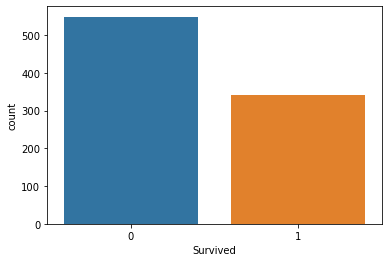

In [45]:
sns.countplot(x="Survived", data=Titanic_df)
print(Titanic_df["Survived"].value_counts())

From the above graph we analyze that only 342 people will be survived out of 891

3    491
1    216
2    184
Name: Pclass, dtype: int64


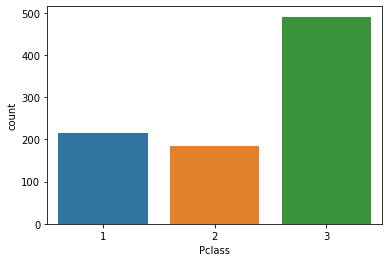

In [46]:
sns.countplot(x="Pclass", data=Titanic_df)
print(Titanic_df["Pclass"].value_counts())

From the above graph we analyze that passengers are more in Pclass-3

male      577
female    314
Name: Sex, dtype: int64


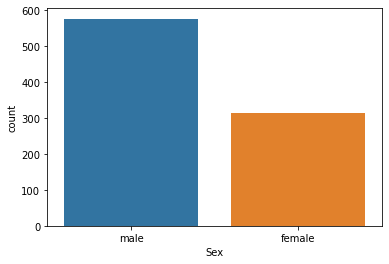

In [52]:
sns.countplot(x="Sex", data=Titanic_df)
print(Titanic_df["Sex"].value_counts())

from the above graph we predict that male passengers are more than female passengers

S    644
C    168
Q     77
Name: Embarked, dtype: int64


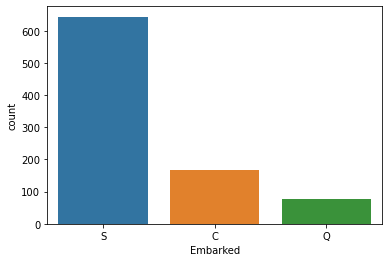

In [53]:
sns.countplot(x="Embarked", data=Titanic_df)
print(Titanic_df["Embarked"].value_counts())

from the above graph we predict that  at Embarked "S" more number of passengers boarded the ship

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


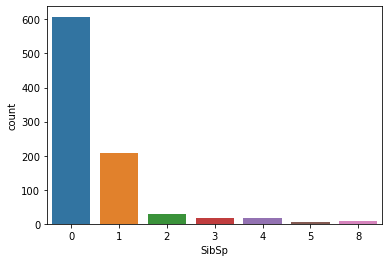

In [54]:
sns.countplot(x="SibSp", data=Titanic_df)
print(Titanic_df["SibSp"].value_counts())

from the above graph we predict that  at only few members will have more siblings and spouse

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


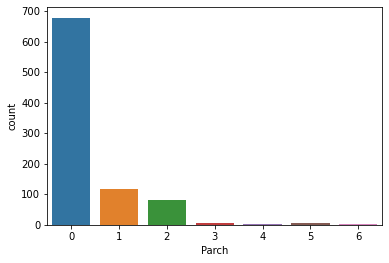

In [55]:
sns.countplot(x="Parch", data=Titanic_df)
print(Titanic_df["Parch"].value_counts())

from the above graph we predict that  at only one person will have six parents and children 

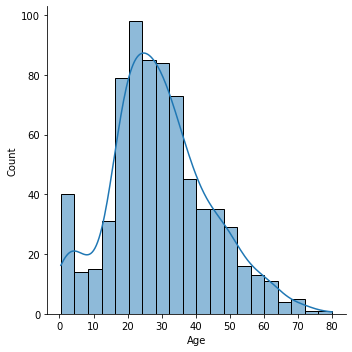

In [60]:
#for continious data
sns.displot(Titanic_df["Age"], kde=True)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

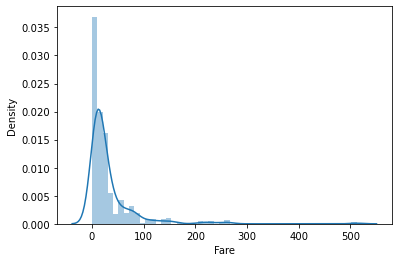

In [62]:
sns.distplot(Titanic_df["Fare"], kde=True)

skewness is present in fare, we have to remove the skewness for better results

Bi-Variate Analysis:

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

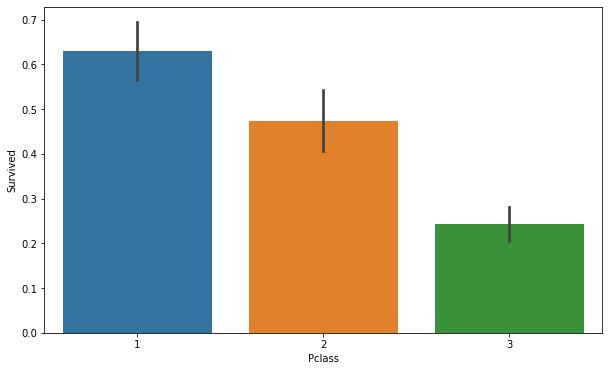

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pclass', y="Survived", data=Titanic_df)

People present in class 1 will be survived more when compare to remaining classes

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

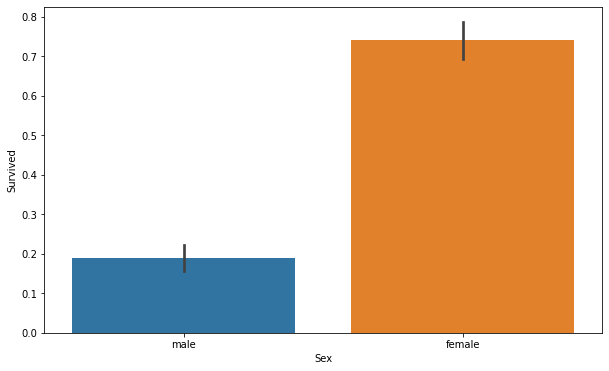

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(x='Sex', y="Survived", data=Titanic_df)

Female survived more when compare with male

In [71]:
#Age-calculate seperately which age people survived more in male and female
Titanic_df_male=Titanic_df[(Titanic_df["Sex"]=="male")]

In [79]:
len(Titanic_df_male)

577

In [74]:
Titanic_df_female=Titanic_df[(Titanic_df["Sex"]=="female")]

In [80]:
len(Titanic_df_female)

314

<AxesSubplot:xlabel='Age', ylabel='Survived'>

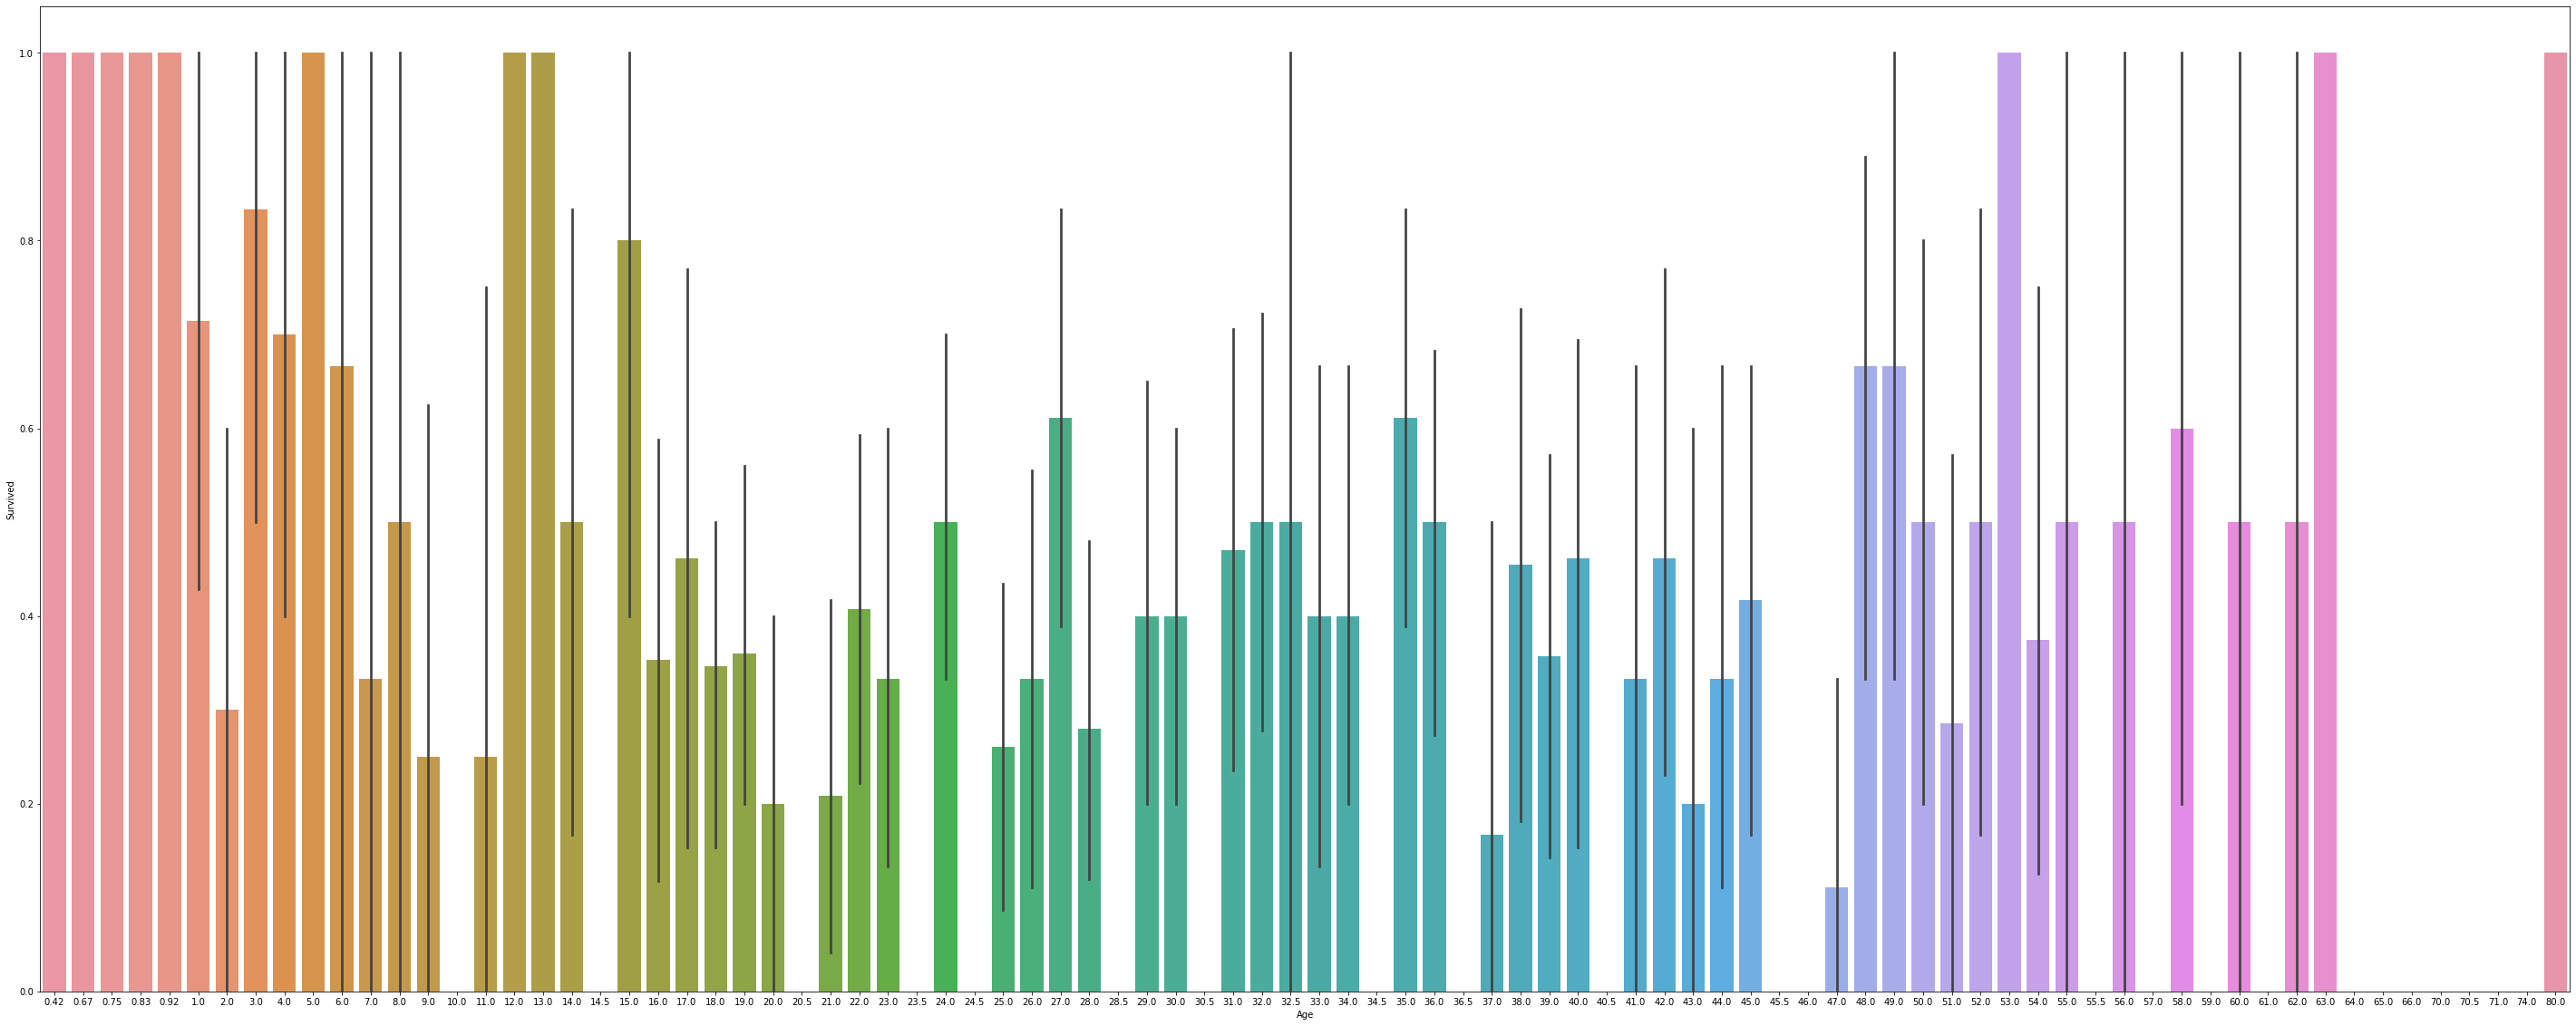

In [83]:
plt.figure(figsize=(50,20))
sns.barplot(x='Age', y="Survived", data=Titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

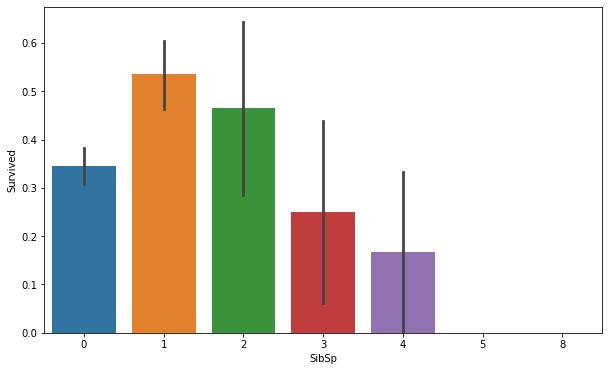

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x='SibSp', y="Survived", data=Titanic_df)

Here we can see that the chances of survival decreases as the number of Siblings/Spouses aboard on the titanic.

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

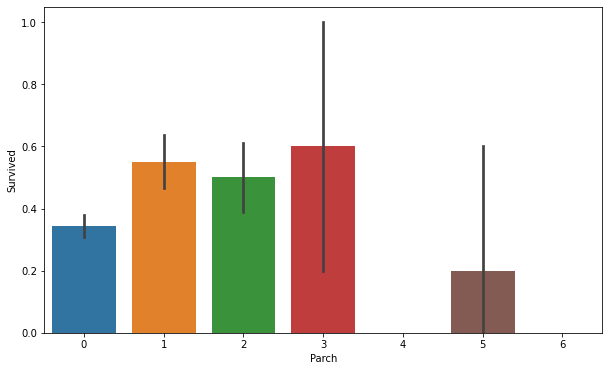

In [87]:

plt.figure(figsize=(10,6))
sns.barplot(x='Parch', y="Survived", data=Titanic_df)

more people survied at 1,2,3 feaures.
Ticket column is a combination of both string and numerical values so we can drop the column

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

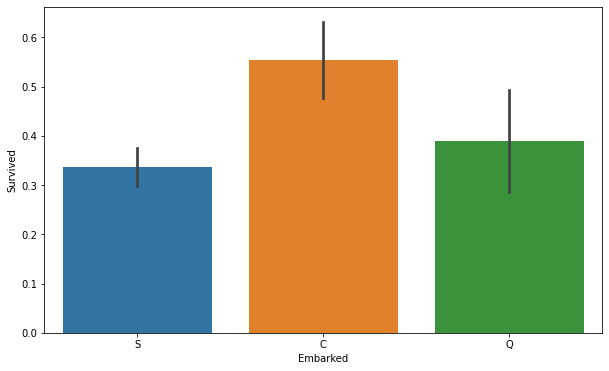

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x='Embarked', y="Survived", data=Titanic_df)

the people either male or female borded at "C" survived more than other embarked stations

In [99]:
Titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [109]:
Titanic_df_male=Titanic_df[Titanic_df["Sex"]=="male"]

In [110]:
Titanic_df_male

PassengerId  Survived  Pclass  \
0              1         0       3   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
12            13         0       3   
13            14         0       3   
16            17         0       3   
17            18         1       2   
20            21         0       2   
21            22         1       2   
23            24         1       1   
26            27         0       3   
27            28         0       1   
29            30         0       3   
30            31         0       1   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
42            43         0       3   
45            46         0       3   
46            47         0       3   
48            49         0       3   
50            51         0       3   
51            52         0       3   
54            55         0       1   
55            56         1       1   
57            58         0       3   
59            60         0       3   
60            61         0       3   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
67            68         0       3   
69            70         0       3   
70            71         0       2   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
80            81         0       3   
81            82         1       3   
83            84         0       1   
86            87         0       3   
87            88         0       3   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
99           100         0       2   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          105         0       3   
105          106         0       3   
107          108         1       3   
108          109         0       3   
110          111         0       1   
112          113         0       3   
115          116         0       3   
116          117         0       3   
117          118         0       2   
118          119         0       1   
120          121         0       2   
121          122         0       3   
122          123         0       2   
124          125         0       1   
125          126         1       3   
126          127         0       3   
127          128         1       3   
129          130         0       3   
130          131         0       3   
131          132         0       3   
134          135         0       2   
135          136         0       2   
137          138         0       1   
138          139         0       3   
139          140         0       1   
143          144         0       3   
144          145         0       2   
145          146         0       2   
146          147         1       3   
148          149         0       2   
149          150         0       2   
150          151         0       2   
152          153         0       3   
153          154         0       3   
154          155         0       3   
155          156         0       1   
157          158         0       3   
158          159         0       3   
159          160         0       3   
160          161         0       3   
162          16

In [111]:
len(Titanic_df_male)

577

In [105]:
Titanic_df_female=Titanic_df[Titanic_df["Sex"]=="female"]

In [106]:
Titanic_df_female

PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
14            15         0       3   
15            16         1       2   
18            19         0       3   
19            20         1       3   
22            23         1       3   
24            25         0       3   
25            26         1       3   
28            29         1       3   
31            32         1       1   
32            33         1       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
43            44         1       2   
44            45         1       3   
47            48         1       3   
49            50         0       3   
52            53         1       1   
53            54         1       2   
56            57         1       2   
58            59         1       2   
61            62         1       1   
66            67         1       2   
68            69         1       3   
71            72         0       3   
79            80         1       3   
82            83         1       3   
84            85         1       2   
85            86         1       3   
88            89         1       1   
98            99         1       2   
100          101         0       3   
106          107         1       3   
109          110         1       3   
111          112         0       3   
113          114         0       3   
114          115         0       3   
119          120         0       3   
123          124         1       2   
128          129         1       3   
132          133         0       3   
133          134         1       2   
136          137         1       1   
140          141         0       3   
141          142         1       3   
142          143         1       3   
147          148         0       3   
151          152         1       1   
156          157         1       3   
161          162         1       2   
166          167         1       1   
167          168         0       3   
172          173         1       3   
177          178         0       1   
180          181         0       3   
184          185         1       3   
186          187         1       3   
190          191         1       2   
192          193         1       3   
194          195         1       1   
195          196         1       1   
198          199         1       3   
199          200         0       2   
205          206         0       3   
208          209         1       3   
211          212         1       2   
215          216         1       1   
216          217         1       3   
218          219         1       1   
229          230         0       3   
230          231         1       1   
233          234         1       3   
235          236         0       3   
237          238         1       2   
240          241         0       3   
241          242         1       3   
246          247         0       3   
247          248         1       2   
251          252         0       3   
254          255         0       3   
255          256         1       3   
256          257         1       1   
257          258         1       1   
258          259         1       1   
259          260         1       2   
264          265         0       3   
268          269         1       1   
269          270         1       1   
272          273         1       2   
274          275         1       3   
275          276         1       1   
276          277         0       3   
279          280         1       3   
289          290         1       3   
290          291         1       1   
291          292         1       1   
293          29

In [107]:

len(Titanic_df_female)

314

In sex column number of males is higher than Female

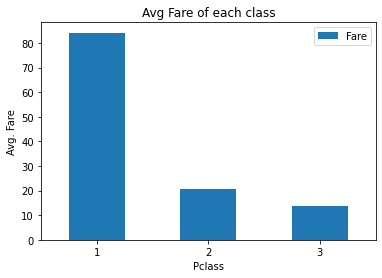

In [127]:
class_fare=Titanic_df.pivot_table(index="Pclass", values="Fare")
class_fare.plot(kind="bar")
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.title("Avg Fare of each class")
plt.show()


the Pclass-1 fare is high than class 2 and 3

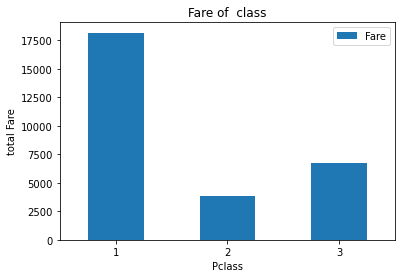

In [134]:
class_fare=Titanic_df.pivot_table(index="Pclass", values="Fare", aggfunc=np.sum)
class_fare.plot(kind="bar")
plt.xlabel('Pclass')
plt.ylabel('total Fare')
plt.title("Fare of  class")
plt.xticks(rotation=0)
plt.show()


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

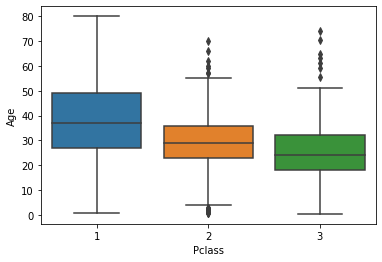

In [133]:
sns.boxplot(data=Titanic_df, x="Pclass", y="Age", orient="v")


from above box plot, we can observe that the passengers in the first class and second class tend to actually be a bit older than passengers in the third class.

# Data preprocessing:

In [136]:
#remove the null values
Titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

#Already i have dropped the cabin column because it has morethan 70% of null values

Embarked consists of 2 nul values it can be filled by applying  mode because Emnbarkd is a categorical data for that we will fill null values using mode not mean
Mode means the value in the column has occurred the maximum number of times

In [137]:
print(Titanic_df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [138]:
#Replacing the missing values in the “Embarked” column with mode value
Titanic_df['Embarked'].fillna(Titanic_df['Embarked'].mode()[0], inplace=True)

In [142]:
#the null values in continious column can be replaced with mean

#Replacing the missing values in the “Age” column with the mean value
Titanic_df['Age'].fillna(Titanic_df['Age'].mean(), inplace=True)

In [143]:
Titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [144]:
Titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#null values willbe filled

Data integration:

The two columns that contain string-type values: The “Sex” column and the “Embarked” column. Apply Label encoding to convert that into integer type values, and transform it into a categorical column:

In [145]:
Titanic_df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [146]:
Titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [147]:
Titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

In [154]:
Titanic_df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
30            31         0       1   
31            32         1       1   
32            33         1       3   
33            34         0       2   
34            35         0       1   
35            36         0       1   
36            37         1       3   
37            38         0       3   
38            39         0       3   
39            40         1       3   
40            41         0       3   
41            42         0       2   
42            43         0       3   
43            44         1       2   
44            45         1       3   
45            46         0       3   
46            47         0       3   
47            48         1       3   
48            49         0       3   
49            50         0       3   
50            51         0       3   
51            52         0       3   
52            53         1       1   
53            54         1       2   
54            55         0       1   
55            56         1       1   
56            57         1       2   
57            58         0       3   
58            59         1       2   
59            60         0       3   
60            61         0       3   
61            62         1       1   
62            63         0       1   
63            64         0       3   
64            65         0       1   
65            66         1       3   
66            67         1       2   
67            68         0       3   
68            69         1       3   
69            70         0       3   
70            71         0       2   
71            72         0       3   
72            73         0       2   
73            74         0       3   
74            75         1       3   
75            76         0       3   
76            77         0       3   
77            78         0       3   
78            79         1       2   
79            80         1       3   
80            81         0       3   
81            82         1       3   
82            83         1       3   
83            84         0       1   
84            85         1       2   
85            86         1       3   
86            87         0       3   
87            88         0       3   
88            89         1       1   
89            90         0       3   
90            91         0       3   
91            92         0       3   
92            93         0       1   
93            94         0       3   
94            95         0       3   
95            96         0       3   
96            97         0       1   
97            98         1       1   
98            99         1       2   
99           100         0       2   
100          101         0       3   
101          102         0       3   
102          103         0       1   
103          104         0       3   
104          10

In [155]:
# we can see, that there are few columns, which contain both integer and string values those are not of much importance in this process. Let us get rid of them
Titanic_data=Titanic_df.drop(columns = ['PassengerId','Name','Ticket'],axis=1)

In [151]:
Titanic_data

Survived  Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0           0       3    0  22.000000      1      0    7.2500         0
1           1       1    1  38.000000      1      0   71.2833         1
2           1       3    1  26.000000      0      0    7.9250         0
3           1       1    1  35.000000      1      0   53.1000         0
4           0       3    0  35.000000      0      0    8.0500         0
5           0       3    0  29.699118      0      0    8.4583         2
6           0       1    0  54.000000      0      0   51.8625         0
7           0       3    0   2.000000      3      1   21.0750         0
8           1       3    1  27.000000      0      2   11.1333         0
9           1       2    1  14.000000      1      0   30.0708         1
10          1       3    1   4.000000      1      1   16.7000         0
11          1       1    1  58.000000      0      0   26.5500         0
12          0       3    0  20.000000      0      0    8.0500         0
13          0       3    0  39.000000      1      5   31.2750         0
14          0       3    1  14.000000      0      0    7.8542         0
15          1       2    1  55.000000      0      0   16.0000         0
16          0       3    0   2.000000      4      1   29.1250         2
17          1       2    0  29.699118      0      0   13.0000         0
18          0       3    1  31.000000      1      0   18.0000         0
19          1       3    1  29.699118      0      0    7.2250         1
20          0       2    0  35.000000      0      0   26.0000         0
21          1       2    0  34.000000      0      0   13.0000         0
22          1       3    1  15.000000      0      0    8.0292         2
23          1       1    0  28.000000      0      0   35.5000         0
24          0       3    1   8.000000      3      1   21.0750         0
25          1       3    1  38.000000      1      5   31.3875         0
26          0       3    0  29.699118      0      0    7.2250         1
27          0       1    0  19.000000      3      2  263.0000         0
28          1       3    1  29.699118      0      0    7.8792         2
29          0       3    0  29.699118      0      0    7.8958         0
30          0       1    0  40.000000      0      0   27.7208         1
31          1       1    1  29.699118      1      0  146.5208         1
32          1       3    1  29.699118      0      0    7.7500         2
33          0       2    0  66.000000      0      0   10.5000         0
34          0       1    0  28.000000      1      0   82.1708         1
35          0       1    0  42.000000      1      0   52.0000         0
36          1       3    0  29.699118      0      0    7.2292         1
37          0       3    0  21.000000      0      0    8.0500         0
38          0       3    1  18.000000      2      0   18.0000         0
39          1       3    1  14.000000      1      0   11.2417         1
40          0       3    1  40.000000      1      0    9.4750         0
41          0       2    1  27.000000      1      0   21.0000         0
42          0       3    0  29.699118      0      0    7.8958         1
43          1       2    1   3.000000      1      2   41.5792         1
44          1       3    1  19.000000      0      0    7.8792         2
45          0       3    0  29.699118      0      0    8.0500         0
46          0       3    0  29.699118      1      0   15.5000         2
47          1       3    1  29.699118      0      0    7.7500         2
48          0       3    0  29.699118      2      0   21.6792         1
49          0       3    1  18.000000      1      0   17.8000         0
50          0       3    0   7.000000      4      1   39.6875         0
51          0       3    0  21.000000      0      0    7.8000         0
52          1       1    1  49.000000      1      0   76.7292         1
53          1       2    1  29.000000      1      0   26.0000         0
54          0       1    0  65.000000      0 

In [153]:
#find the corrrealation between the columns with target variable
Titanic_data.corr()

Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.069809 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.331339  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.084153  0.114631  0.245489   
Age      -0.069809 -0.331339 -0.084153  1.000000 -0.232625 -0.179191   
SibSp    -0.035322  0.083081  0.114631 -0.232625  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.179191  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.091566  0.159651  0.216225   
Embarked  0.106811  0.045702  0.116569  0.007461 -0.059961 -0.078665   

              Fare  Embarked  
Survived  0.257307  0.106811  
Pclass   -0.549500  0.045702  
Sex       0.182333  0.116569  
Age       0.091566  0.007461  
SibSp     0.159651 -0.059961  
Parch     0.216225 -0.078665  
Fare      1.000000  0.062142  
Embarked  0.062142  1.000000

In [156]:
Titanic_data.corr()["Survived"].sort_values()

Pclass     -0.338481
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Embarked    0.106811
Fare        0.257307
Sex         0.543351
Survived    1.000000
Name: Survived, dtype: float64

#+/-0.5 is the range for skewness

#only sex column has skewness and it should will very small difference it will be ignored

In [161]:
#Let’s split the data into the target and feature variables.
X=Titanic_data.drop(["Survived"], axis=1)
X

Pclass  Sex        Age  SibSp  Parch      Fare  Embarked
0         3    0  22.000000      1      0    7.2500         0
1         1    1  38.000000      1      0   71.2833         1
2         3    1  26.000000      0      0    7.9250         0
3         1    1  35.000000      1      0   53.1000         0
4         3    0  35.000000      0      0    8.0500         0
5         3    0  29.699118      0      0    8.4583         2
6         1    0  54.000000      0      0   51.8625         0
7         3    0   2.000000      3      1   21.0750         0
8         3    1  27.000000      0      2   11.1333         0
9         2    1  14.000000      1      0   30.0708         1
10        3    1   4.000000      1      1   16.7000         0
11        1    1  58.000000      0      0   26.5500         0
12        3    0  20.000000      0      0    8.0500         0
13        3    0  39.000000      1      5   31.2750         0
14        3    1  14.000000      0      0    7.8542         0
15        2    1  55.000000      0      0   16.0000         0
16        3    0   2.000000      4      1   29.1250         2
17        2    0  29.699118      0      0   13.0000         0
18        3    1  31.000000      1      0   18.0000         0
19        3    1  29.699118      0      0    7.2250         1
20        2    0  35.000000      0      0   26.0000         0
21        2    0  34.000000      0      0   13.0000         0
22        3    1  15.000000      0      0    8.0292         2
23        1    0  28.000000      0      0   35.5000         0
24        3    1   8.000000      3      1   21.0750         0
25        3    1  38.000000      1      5   31.3875         0
26        3    0  29.699118      0      0    7.2250         1
27        1    0  19.000000      3      2  263.0000         0
28        3    1  29.699118      0      0    7.8792         2
29        3    0  29.699118      0      0    7.8958         0
30        1    0  40.000000      0      0   27.7208         1
31        1    1  29.699118      1      0  146.5208         1
32        3    1  29.699118      0      0    7.7500         2
33        2    0  66.000000      0      0   10.5000         0
34        1    0  28.000000      1      0   82.1708         1
35        1    0  42.000000      1      0   52.0000         0
36        3    0  29.699118      0      0    7.2292         1
37        3    0  21.000000      0      0    8.0500         0
38        3    1  18.000000      2      0   18.0000         0
39        3    1  14.000000      1      0   11.2417         1
40        3    1  40.000000      1      0    9.4750         0
41        2    1  27.000000      1      0   21.0000         0
42        3    0  29.699118      0      0    7.8958         1
43        2    1   3.000000      1      2   41.5792         1
44        3    1  19.000000      0      0    7.8792         2
45        3    0  29.699118      0      0    8.0500         0
46        3    0  29.699118      1      0   15.5000         2
47        3    1  29.699118      0      0    7.7500         2
48        3    0  29.699118      2      0   21.6792         1
49        3    1  18.000000      1      0   17.8000         0
50        3    0   7.000000      4      1   39.6875         0
51        3    0  21.000000      0      0    7.8000         0
52        1    1  49.000000      1      0   76.7292         1
53        2    1  29.000000      1      0   26.0000         0
54        1    0  65.000000      0      1   61.9792         1
55        1    0  29.699118      0      0   35.5000         0
56        2    1  21.000000      0      0   10.5000         0
57        3    0  28.500000      0      0    7.2292         1
58        2    1   5.000000      1      2   27.7500         0
59        3    0  11.000000      5      2   46.9000         0
60        3    0  22.000000      0      0    7.2292         1
61        1    1  38.000000      0      0   80.0000         0
62        1    0  45.000000      1      0   83.4750         0
63        3    0   4.000000      3   

In [163]:
#Target variable=Y
Y=Titanic_data["Survived"]

In [164]:
Y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

#lets split the data into four variables, namely, X_train, Y_train, X_test, Y_test. for analysis

# spllited 80% of data to training and 20% to testing





In [184]:


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [185]:
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (712,) (179,)


After performing train_test_split we have to choose the models to pass the training variable.

In [186]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, Y_train)



LogisticRegression()

In [187]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of training data :  0.8075842696629213
Accuracy score of test data :  0.7821229050279329


In [188]:
/

[[91  9]
 [30 49]]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179

f1_score: 0.7153284671532847


Random Forest Classifier:

In [192]:

from sklearn.ensemble import RandomForestClassifier

In [193]:
rfc=RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [194]:
predrfc=rfc.predict(X_test)
print('Accuracy Score:' , accuracy_score(Y_test, predrfc))
print(confusion_matrix(Y_test, predrfc))
print(classification_report(Y_test, predrfc))
print("f1_score:" , f1_score(Y_test, predrfc))

Accuracy Score: 0.8044692737430168
[[87 13]
 [22 57]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       100
           1       0.81      0.72      0.77        79

    accuracy                           0.80       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.80      0.80       179

f1_score: 0.7651006711409395


KNN Classifier

In [195]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier 

In [196]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [197]:
predknn=knn.predict(X_test)
print('Accuracy Score:' , accuracy_score(Y_test, predknn))
print(confusion_matrix(Y_test, predknn))
print(classification_report(Y_test, predknn))
print("f1_score:" , f1_score(Y_test, predknn))

Accuracy Score: 0.6815642458100558
[[83 17]
 [40 39]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       100
           1       0.70      0.49      0.58        79

    accuracy                           0.68       179
   macro avg       0.69      0.66      0.66       179
weighted avg       0.68      0.68      0.67       179

f1_score: 0.5777777777777778


Support vector classifier:

In [202]:
from sklearn.svm import SVC

In [205]:
svc=SVC()
svc.fit(X_train, Y_train)

SVC()

In [206]:
predsvc=svc.predict(X_test)
print('Accuracy Score:' , accuracy_score(Y_test, predsvc))
print(confusion_matrix(Y_test, predsvc))
print(classification_report(Y_test, predsvc))
print("f1_score:" , f1_score(Y_test, predsvc))

Accuracy Score: 0.6368715083798883
[[95  5]
 [60 19]]
              precision    recall  f1-score   support

           0       0.61      0.95      0.75       100
           1       0.79      0.24      0.37        79

    accuracy                           0.64       179
   macro avg       0.70      0.60      0.56       179
weighted avg       0.69      0.64      0.58       179

f1_score: 0.36893203883495146


GaussianNB from sklearn.naive_bayes:

In [207]:
from sklearn.naive_bayes import GaussianNB

In [208]:
gnb=GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [209]:
predgnb=gnb.predict(X_test)
print('Accuracy Score:' , accuracy_score(Y_test, predgnb))
print(confusion_matrix(Y_test, predgnb))
print(classification_report(Y_test, predgnb))
print("f1_score:" , f1_score(Y_test, predgnb))

Accuracy Score: 0.7597765363128491
[[86 14]
 [29 50]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       100
           1       0.78      0.63      0.70        79

    accuracy                           0.76       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179

f1_score: 0.6993006993006993


Conclusion from models:

We got our best model i.e. Random Forest Classifier: with the accuracy score of 80.4%. Here our model predicts 87 true positive cases out of 176 positive cases and 13 true negative cases out of 119 cases.

It predicts 22 false positive cases out of 176 positive cases and 57 false negative cases out of 119 cases. It gives the f1 score of 76.5%.

In [212]:
#Output:

input_data = (3,0,35,0,0,8.05,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [217]:
prediction = rfc.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
else:
    print("Alive")

Dead


In [215]:
input_data = (1,0,54,0,0,51.86,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [218]:
prediction = rfc.predict(input_data_reshaped)
#print(prediction)
if prediction[0]==0:
    print("Dead")
else:
    print("Alive")

Dead
